# Week 4 Time Series

We will learn some basic handling of time series

## Timestamps

In [1]:
import pandas as pd
# Create a timestamp
pd.Timestamp(year=2024,
            month=10,
            day=21,
            hour=10,
            minute=1,
            second=30)

Timestamp('2024-10-21 10:01:30')

In [2]:
pd.Series([pd.Timestamp(2020,10,18),
          pd.Timestamp(2020,10,19),
          pd.Timestamp(2020,10,10),])

0   2020-10-18
1   2020-10-19
2   2020-10-10
dtype: datetime64[ns]

## Read in data and explore

In [5]:
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<AxesSubplot:>

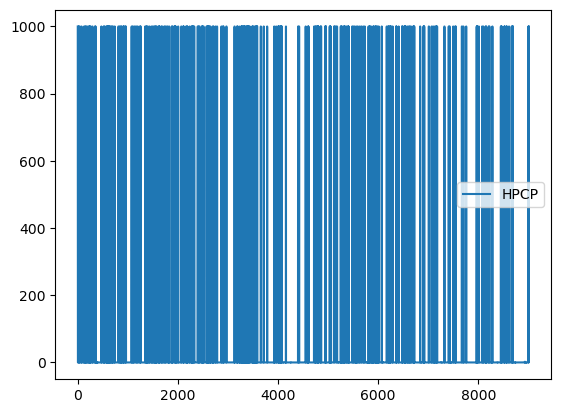

In [4]:
# Plot hourly precipitation in boulder, CO
precip.plot()

### What's wrong with this?
Outliers: There are many jumps close to 1000. This is clearly not right and these are outliers. Looking at the column descriptions we can see 999.99 indicates the hourly precipitation data is missing.

Indexing: The 
-axis values are given by the index of the dataframe and not relative to time.

Time range: We are only intersted in the precipitation data from 2013, this graph is trying to plot all our data.

## Reading in missing data values
Reload data frame indicating that 999.99 is NA

In [6]:
# Read in csv indicating NA values based on metadata
precip = pd.read_csv(URL, na_values=[999.99])

In [7]:
precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<AxesSubplot:>

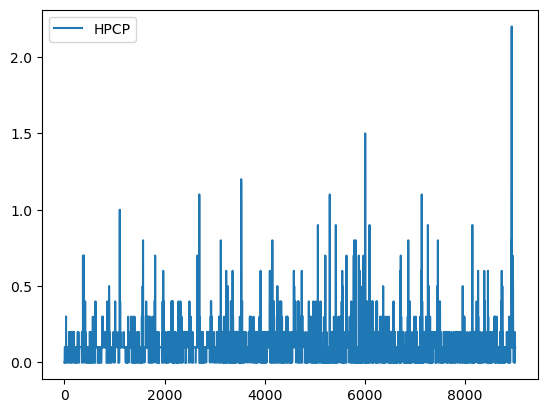

In [8]:
precip.plot()

## Convert strings into dates

Notice that the `date` column in df is not of type `datetime`:

In [9]:
# Check whether date column is type datetime
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

Remember that `object` data type means that (most likely) all values in that column are strings (words!)

We can convert string to date time objects

In [11]:
# Convert to datetime
precip['DATE'] = pd.to_datetime(precip['DATE'])

In [12]:
precip.dtypes

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object

<AxesSubplot:xlabel='DATE'>

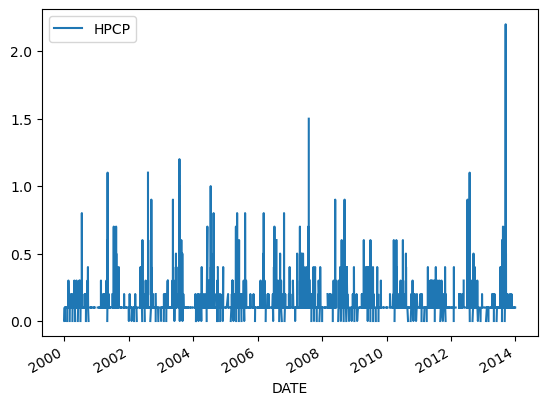

In [13]:
precip.plot(x='DATE', y='HPCP')

Next, set the date column as the index to perform operations with respect to time 

In [14]:
# Set date column to index
precip = precip.set_index('DATE')

# Inspect new index
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


## Leverage `pd.read_csv()` to set index


In [15]:
'''
Read in boulder, CO hourly precip data and 
HPCP = hourly precipitation 
'''
df = pd.read_csv(URL,
                na_values=[999.99],
                index_col=['DATE'],
                parse_dates=['DATE'])

## Subsetting by date

examples:
in general we can use `.loc[year-month]` to select data from specific year and month 

In [16]:
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


## Resampling 

a time series means converting a time series from one frequency to another. For example, monthly to yearly (downsampling) or weekly to daily (upsampling). We can resample with the resample() method. The simplest use is to call

`df.resample(new_frequency).aggregator_function()`

where: - new_frequency is a string representing the new frequence to resample the data, for example 'D' for day, w for week, M for month, Y for year, and - aggregator_function() is the function we will use to aggregate the data into the new frequency. For example, max(), min(), sum(), or average().

The resample() method works similarly to groupby() in the sense that you need to specify a way to aggregate the data to get any output.

In [18]:
# Resample 2013 hourly data to daily frequency: no output
precip.loc['2013'].resample('D')

In [20]:
# Total daily precip in 2013
daily_precip_2013 = precip.loc['2013'].resample('D').sum()

Created a new pd series where the index is every single day in the year, not hour by hour data points

<AxesSubplot:xlabel='DATE'>

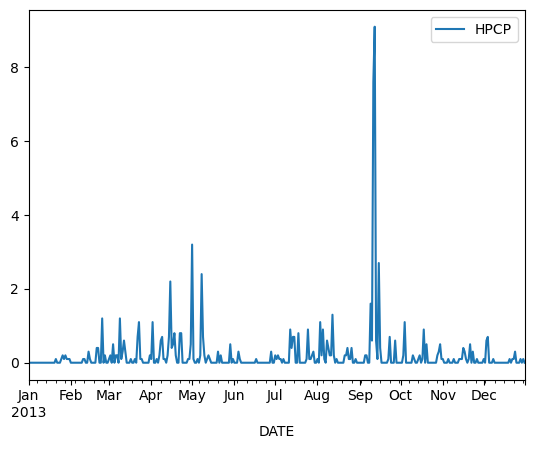

In [21]:
daily_precip_2013.plot()

Filled in missing values for day and it looks a lot smoother

## Complete workflow



<AxesSubplot:title={'center':'Precipitation in Boulder, CO during 2013'}, xlabel=' ', ylabel='daily precipitation (in)'>

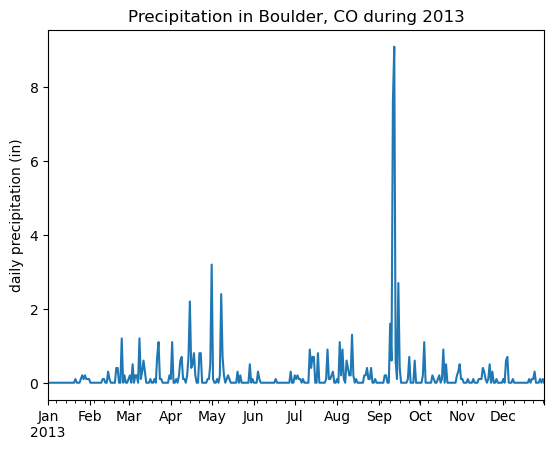

In [22]:
import pandas as pd

'''
Read in Boulder, CO hourly precipitation data 
HPCP = hourly precipitation (unique numerical column in data frame)
'''
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL, 
                    na_values=[999.99],  # Known from metadata
                    index_col=['DATE'], 
                    parse_dates=['DATE']
                    )


# Calculate daily total precipitation during 2013
daily_precip_2013 = (precip.loc['2013']
                            .resample('D')
                            .sum()
                            .rename(columns={'HPCP':'daily_precipitation'})  
                            )

# Plot time series
daily_precip_2013.plot(ylabel='daily precipitation (in)', 
                       xlabel=' ',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)